In [3]:
# 方差过滤对结果的影响
# 方差过滤对结果的影响 
#KNN vs 随机森林在不同方差过滤效果下的对比
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold  # 导入VarianceThreshold类
import numpy as np
import pandas as pd
data = pd.read_csv(r'D:\desktop\NeualNetworks\Tree\Skearn\3特征工程\digit_red.csv')
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
print("有数据了")
 

有数据了


In [ ]:
#======【TIME WARNING：4 hours】======#
 #%%timeit
cross_val_score(KNN(),X,y,cv=5).mean()
 

In [13]:
X_fsvar.shape

(42000, 392)

In [10]:
%%timeit
# 随机森林在过滤后的数据集上的效果
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsvar,y,cv=5).mean()

18.5 s ± 80.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 随机森林速度快一点

卡方过滤

In [14]:
# 卡方过滤
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_fschi = SelectKBest(chi2, k=340).fit_transform(X_fsvar, y)
X_fschi.shape

(42000, 340)

In [15]:
# 交叉验证
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()

0.9380714285714287

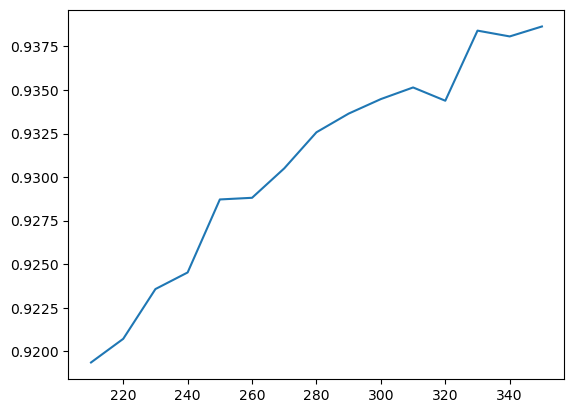

In [27]:
%matplotlib inline
# 绘制学习曲线
import matplotlib.pyplot as plt
score = []
for i in range(350,200,-10):
    X_fschi = SelectKBest(chi2, k= i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()
    score.append(once)
plt.plot(range(350,200,-10), score)
plt.show()

In [0]:
# 获取卡方值和P值 也是一种假设检验
chivalue, pvalues_chi = chi2(X_fsvar, y)

In [22]:
chivalue

array([ 945664.84392645, 1244766.05139167, 1554872.30384529,
       1834161.78305348, 1903618.94085299, 1845226.62427203,
       1602117.23307541,  708535.17489839,  974050.2051372 ,
       1188092.19961933, 1319151.4346704 , 1397847.88367963,
       1433554.26798019, 1429043.15373436, 1332663.17213408,
       1101423.25372263,  809989.56940487,  519266.71772285,
        285681.88297156,  191589.23696469,  902883.12552642,
       1237265.16042376, 1503477.73699159, 1625807.41495546,
       1630206.9092292 , 1630597.02883808, 1633456.72909668,
       1610816.75571233, 1483382.4954389 , 1256290.15747943,
        951236.16176823,  693192.66191749,  532386.96220362,
        504617.38933716,  575090.36046245,  501025.03733246,
        802341.10683196, 1078344.87244063, 1226540.98318705,
       1269945.07968834, 1221758.57688811, 1146535.17810244,
       1080657.20185306, 1079065.30979138, 1092222.70610035,
       1064908.45385719, 1023327.00231069,  974163.15420168,
        918857.12860619,

In [23]:
pvalues_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()

In [26]:
k 

392

In [28]:
# F检验 数据服从标准正态分布效果会比较好
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(X_fsvar, y)

In [29]:
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [30]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [31]:
k = F.shape[0] - (pvalues_f > 0.05).sum()

In [32]:
k

392

In [33]:
# 互信息法
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X_fsvar, y)

In [34]:
result

array([0.05296305, 0.0590961 , 0.08170731, 0.09246189, 0.09297001,
       0.08942229, 0.06525177, 0.0440543 , 0.06138903, 0.08043674,
       0.08502252, 0.09802418, 0.11664741, 0.11233232, 0.10031415,
       0.08731754, 0.0680666 , 0.03738392, 0.02877264, 0.01311196,
       0.05324373, 0.07566168, 0.09534024, 0.11575283, 0.12920086,
       0.14028202, 0.15642486, 0.15903207, 0.14443545, 0.12078546,
       0.08820933, 0.06040157, 0.04483319, 0.0371653 , 0.0353297 ,
       0.02633659, 0.04187476, 0.05824128, 0.07341156, 0.10022284,
       0.09327371, 0.10276726, 0.11129554, 0.12225051, 0.13471571,
       0.12470745, 0.10609212, 0.08603921, 0.07376733, 0.06304316,
       0.05659306, 0.05255847, 0.05404336, 0.04108765, 0.04557108,
       0.05442716, 0.05765223, 0.05600919, 0.05449171, 0.06262554,
       0.06307521, 0.06818975, 0.08060267, 0.07543841, 0.06735448,
       0.07435192, 0.07314726, 0.07138354, 0.06055277, 0.05877637,
       0.0614339 , 0.03102079, 0.03994206, 0.04816215, 0.05252

In [38]:
# 互信息量大于0 就是相关
k = result.shape[0] - (result <= 0).sum()


In [39]:
k

330

In [40]:
# 嵌入法
# 缺点：运行速度慢
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
# 实例化随机森林
RFC_ = RFC(n_estimators=10, random_state=0)
X_embedded = SelectFromModel(RFC_, threshold=0.005).fit_transform(X, y)

In [41]:
X_embedded.shape

(42000, 47)

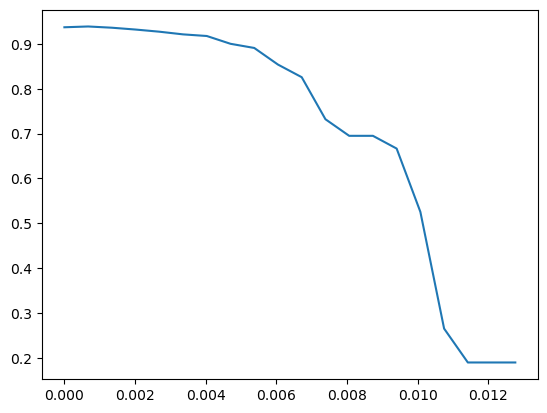

In [42]:
# 绘制学习曲线找到最佳阈值
import numpy as np
import matplotlib.pyplot as plt
RFC_.fit(X, y).feature_importances_
threshold = np.linspace(0, (RFC_.fit(X, y).feature_importances_).max(), 20)
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(X, y)
    once = cross_val_score(RFC_, X_embedded, y, cv=5).mean()
    score.append(once)
plt.plot(threshold, score)
plt.show()

In [0]:
# RFE 
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10, random_state=0)
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)

In [5]:
selector.support_.sum()

340

In [6]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [4]:
X_wrapper = selector.transform(X)
cross_val_score(RFC_, X_wrapper, y, cv=5).mean()

0.9379761904761905

In [0]:
# 绘制包装法的学习曲线
import matplotlib.pyplot as plt
score = []
for i in range(1, 751, 50):
    X_wrapper = RFE(RFC_, n_features_to_select=i, step=50).fit_transform(X, y)
    once = cross_val_score(RFC_, X_wrapper, y, cv=5).mean()
    score.append(once)

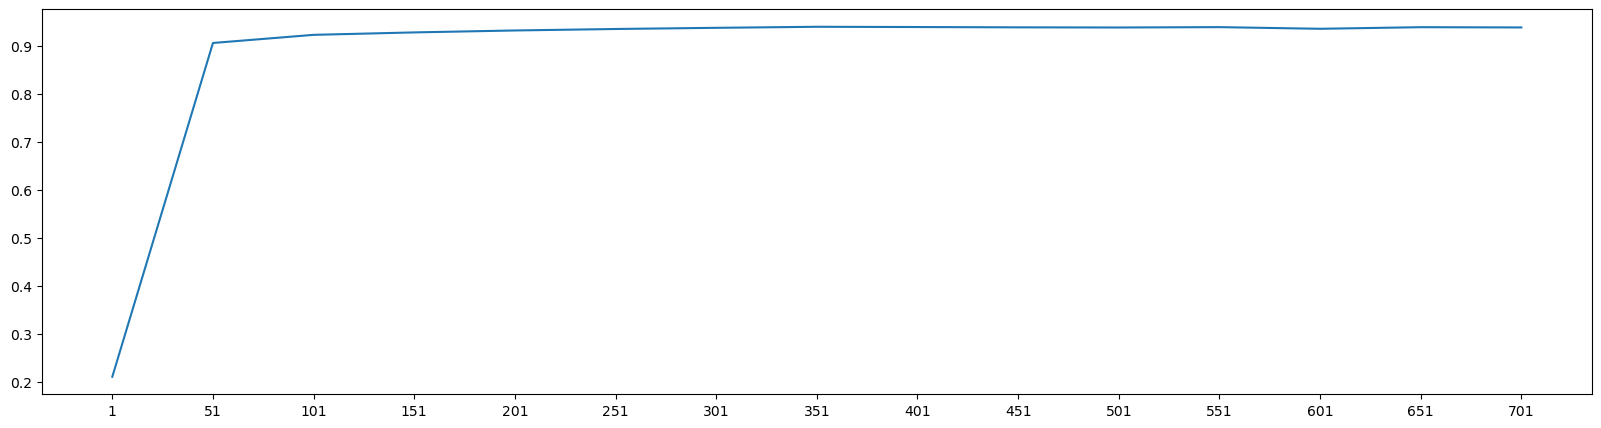

In [9]:

plt.figure(figsize=[20, 5])
plt.plot(range(1, 751, 50), score)
plt.xticks(range(1, 751, 50))
plt.show()